# Image classification using cnn

#### The CIFAR-10 dataset,  The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


# Here are the classes in the dataset, as well as 10 random images from each: 
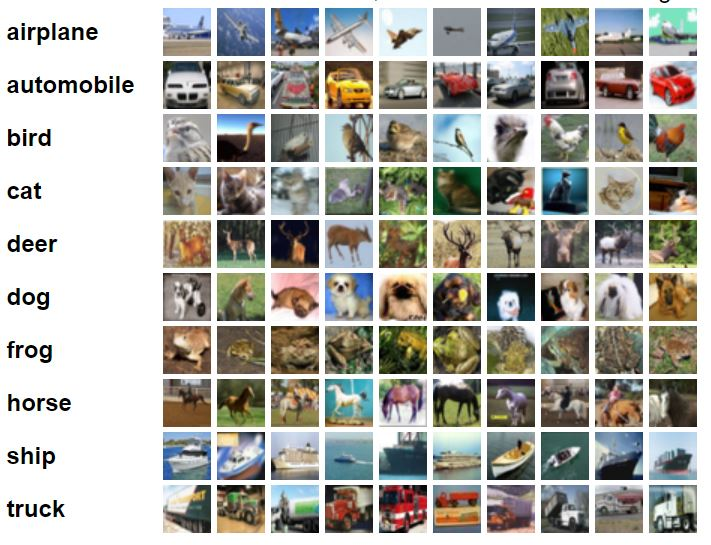								
										


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np

##### Load the Dataset 

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape # there are 50000 training images and 1000 test images

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

##### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array using reshape

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

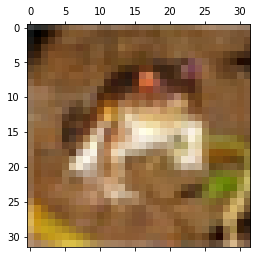

In [9]:

plt.matshow(X_train[0])

###### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.8143 - accuracy: 0.3508
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6229 - accuracy: 0.4298
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5428 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4829 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4327 - accuracy: 0.4957


In [12]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4870 - accuracy: 0.4594


[1.4870225191116333, 0.4593999981880188]

##### You can see that at the end of 5 epochs, accuracy is at around 48.48% 

In [13]:
y_predict = ann.predict(X_test)
y_predict

array([[0.30830967, 0.5602185 , 0.63363355, ..., 0.05703858, 0.64707804,
        0.08767271],
       [0.8178171 , 0.9777484 , 0.12770355, ..., 0.08389702, 0.9910246 ,
        0.962258  ],
       [0.9398576 , 0.9400561 , 0.18698242, ..., 0.15406755, 0.98745227,
        0.84671867],
       ...,
       [0.05656937, 0.05353794, 0.8436892 , ..., 0.5436552 , 0.32929578,
        0.13608831],
       [0.37391865, 0.2814074 , 0.59389156, ..., 0.33775038, 0.252046  ,
        0.20242682],
       [0.46305108, 0.29240787, 0.55257034, ..., 0.8739933 , 0.2554673 ,
        0.23382232]], dtype=float32)

In [14]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5]

[6, 8, 8, 8, 6]

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1000
           1       0.50      0.72      0.59      1000
           2       0.48      0.15      0.23      1000
           3       0.38      0.20      0.26      1000
           4       0.50      0.27      0.35      1000
           5       0.36      0.41      0.39      1000
           6       0.34      0.82      0.48      1000
           7       0.61      0.49      0.54      1000
           8       0.48      0.75      0.58      1000
           9       0.62      0.34      0.44      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000



#### Now let us build a convolutional neural network to train our images 

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4774 - accuracy: 0.4706
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1276 - accuracy: 0.6038
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9980 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9169 - accuracy: 0.6817
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8533 - accuracy: 0.7053
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7947 - accuracy: 0.7237
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7512 - accuracy: 0.7383
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7068 - accuracy: 0.7552
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6692 - accuracy: 0.7672
Epoch 10/10
1563/1563 [==============================] - 36s 23m

##### With CNN, at the end 5 epochs, accuracy was at around 69.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features 

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9294 - accuracy: 0.6963


[0.9294441342353821, 0.6963000297546387]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.0872361e-05, 1.5675520e-03, 6.5230101e-04, 6.8589157e-01,
        7.7039714e-04, 1.9976494e-01, 1.2105608e-03, 6.7384599e-04,
        1.0939726e-01, 4.0775270e-05],
       [5.0591177e-04, 2.4738806e-01, 6.6948019e-07, 1.8712949e-08,
        1.3048466e-10, 8.6349615e-11, 1.8872366e-10, 3.6112663e-10,
        7.5188541e-01, 2.1997663e-04],
       [2.0107712e-01, 1.6329174e-01, 1.6054232e-03, 7.5940916e-04,
        5.1398133e-04, 7.0863432e-05, 1.8793718e-04, 2.1223794e-04,
        5.6195694e-01, 7.0324361e-02],
       [5.4307282e-01, 4.8190687e-02, 7.1410085e-03, 9.4351424e-05,
        1.4103691e-03, 6.7901641e-07, 3.7372590e-06, 3.8921229e-05,
        3.9983326e-01, 2.1412292e-04],
       [4.5676674e-07, 3.6284750e-05, 1.2320681e-02, 5.7559825e-02,
        3.0073029e-01, 2.8291062e-02, 6.0097408e-01, 1.1542156e-05,
        5.8870806e-05, 1.6968881e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

NameError: name 'plot_sample' is not defined